# What is this notebook about?

In this notebook, we provide a simple benchmark to test the implementation of
the code for simulation of the transverse Ising model with random potentials.
The model is defined [here](https://arxiv.org/pdf/1408.0535.pdf).

### The Hamiltonian:

$$
\hat{H} = \sum\limits_{i=1}^L \left[ g\hat{\sigma}_i^x + h\hat{\sigma}_i^z + J\sigma_i^z\sigma_{i+1}^z \right]
$$



### Prepare the code, import libraries

In [1]:
%matplotlib inline
"""
Each of the modules defined in ham1d.models defines a class
for construction of a particular hamiltonian type. All of the
classes share the same base class and thus their functionality
is more or less the same, the difference is in the internal routines
used.
"""

# to load classes utilizing numba's jit
# compilation optimizations, load the following
# modules. The following lines would load modules
# with routines for creation of spin 1/2 hamiltonians
from ham1d.models import spin1d as sp1

import numpy as np
import matplotlib.pyplot as plt

### Construct the Hamiltonian and diagonalize it

#### Set up the model parameters, construct the Hamiltonian object

In [2]:
# system size
L=10
# define constants and model parameters
# we take the values from the paper
g, h, J = (0.9045, 0.8090, 1.)

# interaction:
J_zz = [[J, i, (i+1)%L] for i in range(L)]
inter = ['zz', J_zz]

h_z= [[h, i] for i in range(L)]
rnd_z = ['z', h_z]

g_x = [[g, i] for i in range(L)]
rnd_x = ['x', g_x]

# we can now put together the static_list -> just a list of hamiltonian term
# definitions

static_list = [inter, rnd_z, rnd_x]

# construct the hamiltonian
ham = sp1.hamiltonian(L, static_list, [], Nu=None,parallel=True, mpisize=1, mpirank=0)

Preparing mpi parameters!
Preparing mpi parameters finished!
Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!


#### Diagonalize the Hamiltonian

In [3]:
eigvals = ham.eigvals()

In [6]:
eigvals

array([-4.46333521e+00, -3.88670572e+00, -3.72728742e+00, -3.72728742e+00,
       -3.45246733e+00, -3.45246733e+00, -3.27814530e+00, -3.26909507e+00,
       -3.26909507e+00, -3.09698342e+00, -2.95276762e+00, -2.95276762e+00,
       -2.86714629e+00, -2.86714629e+00, -2.71279696e+00, -2.71279696e+00,
       -2.66413978e+00, -2.59744586e+00, -2.59744586e+00, -2.55947948e+00,
       -2.50411756e+00, -2.44902354e+00, -2.42252269e+00, -2.42252269e+00,
       -2.34397913e+00, -2.34397913e+00, -2.26681400e+00, -2.24166666e+00,
       -2.24166666e+00, -2.22696571e+00, -2.22696571e+00, -2.20818717e+00,
       -2.15841727e+00, -2.09000889e+00, -2.09000889e+00, -2.07546451e+00,
       -2.07546451e+00, -2.02521939e+00, -1.98636849e+00, -1.98636849e+00,
       -1.91379637e+00, -1.91379637e+00, -1.80779413e+00, -1.70877865e+00,
       -1.70877865e+00, -1.65903270e+00, -1.65903270e+00, -1.65670557e+00,
       -1.65167163e+00, -1.62980884e+00, -1.62980884e+00, -1.51012033e+00,
       -1.51012033e+00, -

In [4]:
# also the eigenvectors

eigvals, eigvecs = ham.eigsystem()

# evaluate the sz

#siz_vals = ham.eval_diag_Siz(eigvecs, 1)

In [7]:
siz_vals = ham.eval_diag_Siz(eigvecs, 4)

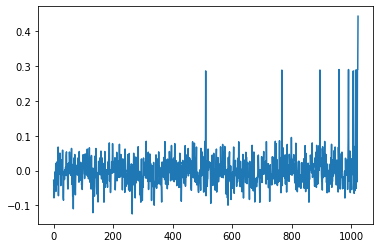

In [8]:
plt.plot(np.real(siz_vals))

#### Perform the same calculation with OBC

OBC - ordinary boundary conditions

In [9]:
# interaction:
J_zz_obc = [[J, i, (i+1)] for i in range(L-1)]
inter_obc = ['zz', J_zz_obc]

static_list_obc = [inter_obc, rnd_z, rnd_x]
ham_obc = sp1.hamiltonian(L, static_list_obc, [], Nu=None,parallel=True, mpisize=1, mpirank=0)

Preparing mpi parameters!
Preparing mpi parameters finished!
Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!


In [10]:
eigvals_obc = ham_obc.eigvals()

In [11]:
eigvals_obc

array([-4.49499048, -3.88079446, -3.78190302, -3.64805144, -3.50306496,
       -3.40027762, -3.32721605, -3.27328664, -3.26520437, -3.11438823,
       -2.98473242, -2.87370325, -2.846518  , -2.74608943, -2.73422232,
       -2.67204167, -2.63809691, -2.6281042 , -2.58208622, -2.55877489,
       -2.50082972, -2.48943219, -2.41244926, -2.39663029, -2.35732737,
       -2.31758484, -2.29925348, -2.27833054, -2.22325339, -2.20609245,
       -2.18706209, -2.16392367, -2.15347911, -2.10558396, -2.10426745,
       -2.07031629, -2.05615632, -2.02627567, -2.01595048, -1.91629198,
       -1.87725522, -1.85394346, -1.77896066, -1.74555148, -1.73018094,
       -1.66302489, -1.65243825, -1.63525808, -1.59531713, -1.58863122,
       -1.54009982, -1.52763915, -1.52018854, -1.48803643, -1.48522635,
       -1.46497405, -1.43628602, -1.42106818, -1.41881167, -1.39888421,
       -1.39632529, -1.38613306, -1.33499429, -1.32786423, -1.30279053,
       -1.28345742, -1.26667739, -1.26581357, -1.24662825, -1.23